### Step 1: Load Real Shenzhen data

In [1]:
from torch.utils import data
from ShenzhenDataset import *

In [2]:
# train_set = Running_Or_Jumping(incl_xyz_accel = True, incl_rms_accel = False, is_normalize = True, data_mode = 'Train')
train_set = shenzhen_dataset(data_size=1000, train_rate=1.0)

In [3]:
real_data_loader = data.DataLoader(train_set, batch_size=1, num_workers=1, shuffle=True)

In [4]:
import matplotlib.pyplot as plt
real_shenzhen = []

for i, (real_sig, label) in enumerate(real_data_loader):
    real_sig = real_sig.cpu().detach().numpy()
    sig = real_sig.reshape(real_sig.shape[1], real_sig.shape[3])
    if label[0] == 7:
        real_shenzhen.append(sig)

real_shenzhen = np.array(real_shenzhen)
print(real_shenzhen.shape)

(1000, 11, 64)


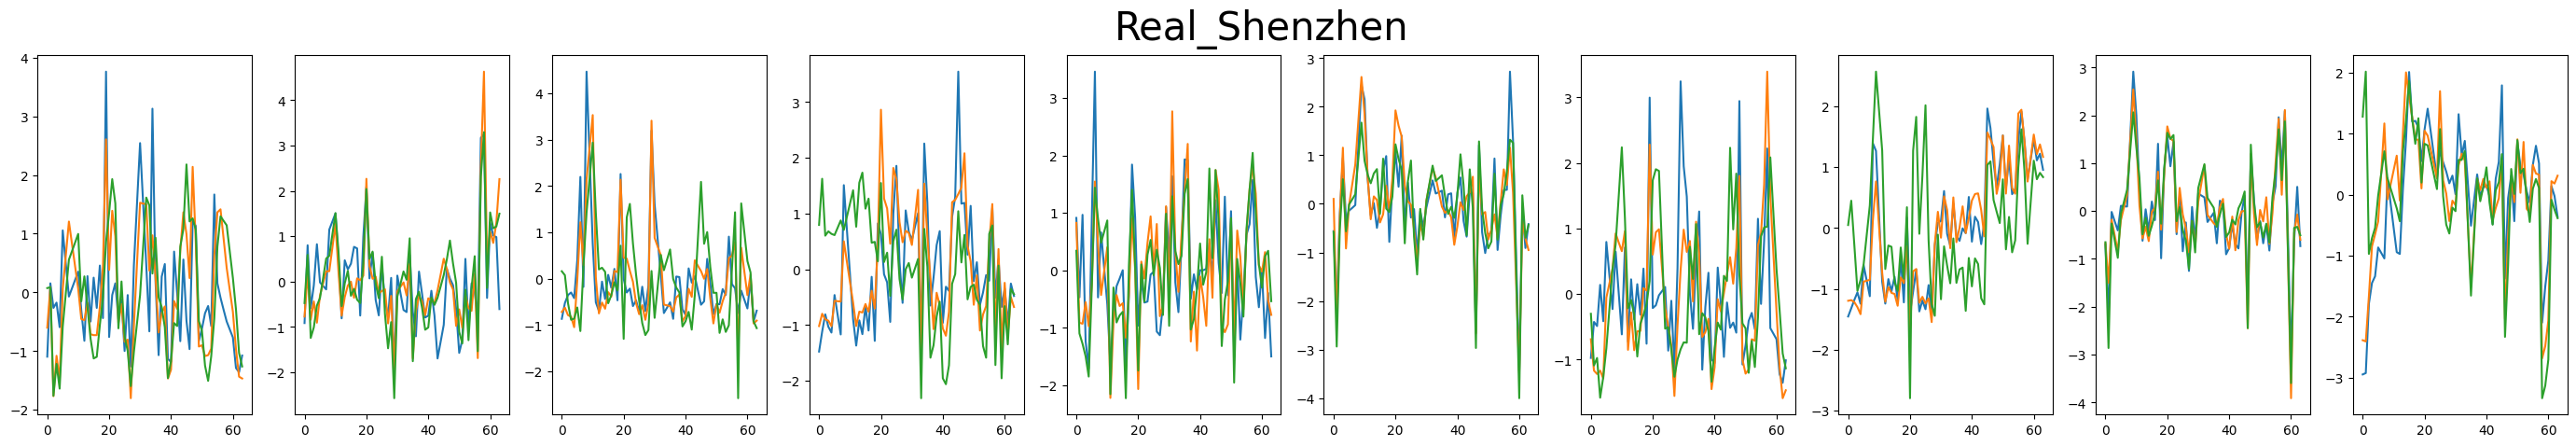

In [5]:
fig, axs = plt.subplots(1, 10, figsize=(35,5))
fig.suptitle('Real_Shenzhen', fontsize=30)
for i in range(10):
    for j in range(3):
        axs[i].plot(real_shenzhen[i*100][j*3][:])

plt.savefig('./images/Real_Shenzhen.pdf', format='pdf')

### Step 2: Load synthetic Shenzhen data

In [6]:
from LoadSyntheticRunningJumping import *
from torch.utils import data

D:\miniconda3\envs\d2l\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] 找不到指定的程序。
  warn(f"Failed to load image Python extension: {e}")


In [7]:
syn_data = Synthetic_Dataset(data_mode='Shenzhen', Shenzhen_model_path='./pre-trained-models/Shenzhen_20000')

(1000, 3, 1, 150)
(1000, 3, 1, 150)
(1000, 11, 1, 64)
(1000, 11, 1, 64)
(1000,)


In [8]:
syn_data_loader = data.DataLoader(syn_data, batch_size=1, num_workers=1, shuffle=True)

In [9]:
import matplotlib.pyplot as plt
syn_shenzhen = []

for i, (syn_sig, label) in enumerate(syn_data_loader):
    syn_sig = syn_sig.cpu().detach().numpy()
    sig = syn_sig.reshape(syn_sig.shape[1], syn_sig.shape[3])
    if label[0] == 7:
        syn_shenzhen.append(sig)

syn_shenzhen = np.array(syn_shenzhen)
print(syn_shenzhen.shape)

(1000, 11, 64)


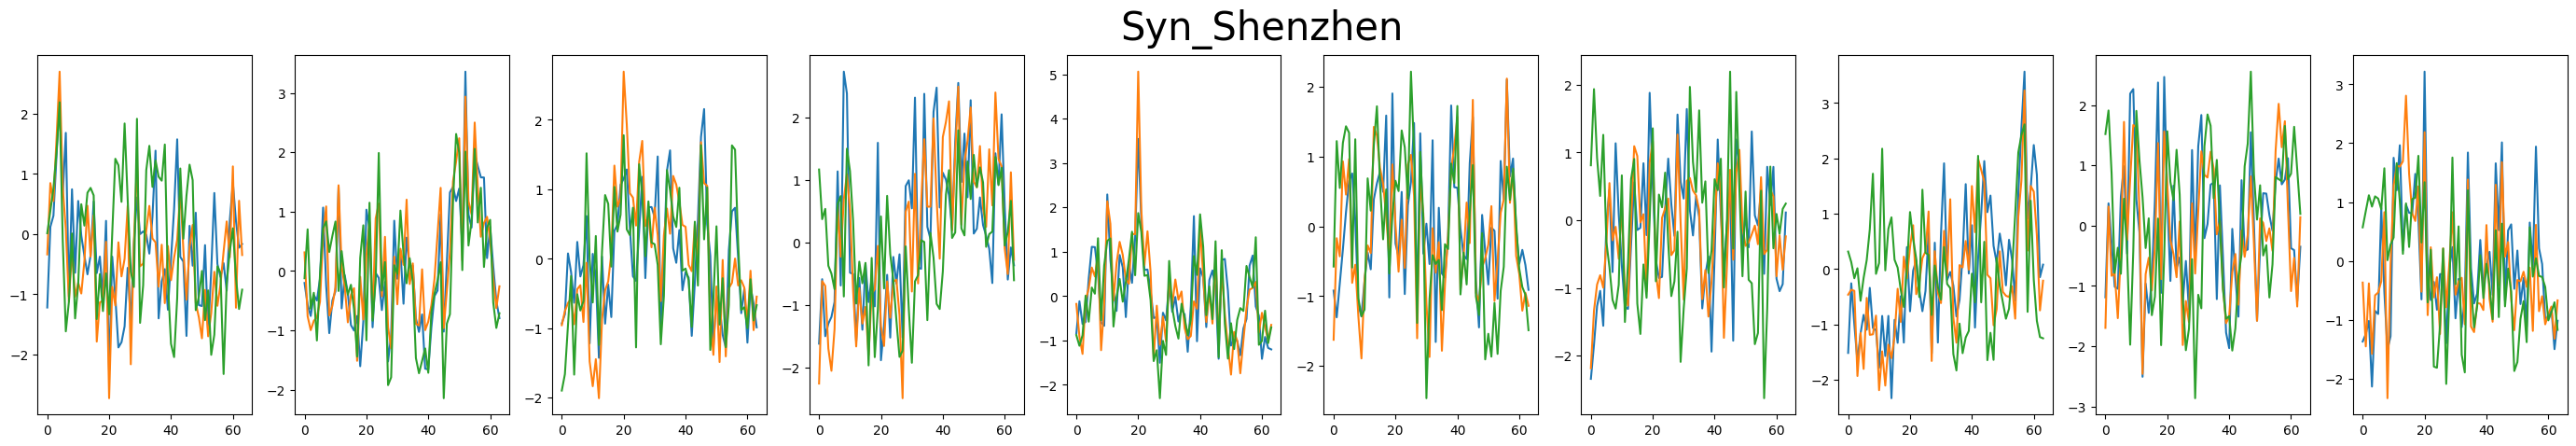

In [10]:
fig, axs = plt.subplots(1, 10, figsize=(35,5))
fig.suptitle('Syn_Shenzhen', fontsize=30)
for i in range(10):
    for j in range(3):
        axs[i].plot(syn_shenzhen[i*100][j*3])

plt.savefig('./images/Syn_Shenzhen.pdf', format='pdf')

### Step 3: PCA

In [11]:
print(real_shenzhen.shape)
print(syn_shenzhen.shape)

(1000, 11, 64)
(1000, 11, 64)


In [12]:
real_shenzhen = np.transpose(real_shenzhen, (0, 2, 1))
syn_shenzhen = np.transpose(syn_shenzhen, (0, 2, 1))
print(real_shenzhen.shape)
print(syn_shenzhen.shape)

(1000, 64, 11)
(1000, 64, 11)


In [13]:
from visualizationMetrics import visualization

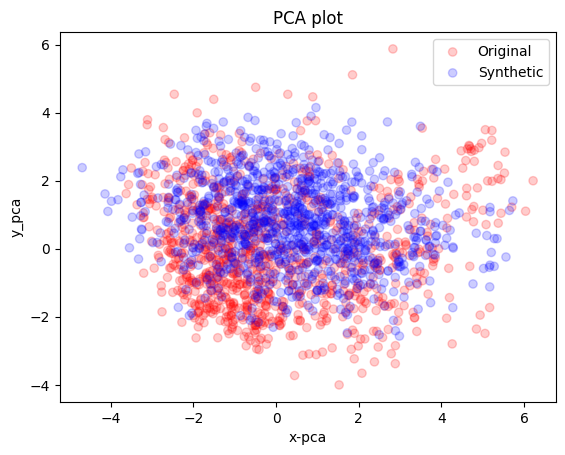

In [14]:
visualization(real_shenzhen, syn_shenzhen, 'pca', 'Shenzhen-PCA')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.180s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 1.937503
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.751404
[t-SNE] KL divergence after 300 iterations: 2.181605


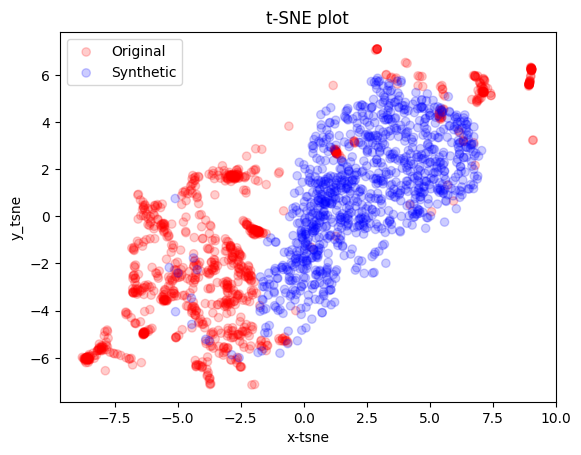

In [15]:
visualization(real_shenzhen, syn_shenzhen, 'tsne', 'Shenzhen-tsne')